### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
# Task 4 Data Access and Exploration
# Load data into Memory
%matplotlib inline
import idx2numpy
import numpy as np
trainfile = 'train-images-idx3-ubyte'
trainfilelabels = 'train-labels-idx1-ubyte'
testfile = 't10k-images-idx3-ubyte'
testfilelabels = 't10k-labels-idx1-ubyte'
x_train = idx2numpy.convert_from_file(trainfile)
y_train = idx2numpy.convert_from_file(trainfilelabels)
x_test = idx2numpy.convert_from_file(testfile)
y_test = idx2numpy.convert_from_file(testfilelabels)

In [2]:
# Verify the data  60000 images each image 28*28 pixels
x_train.shape

(60000, 28, 28)

In [3]:
# What is the shape of the labels for training list of 60000 entries. Each entry indicates the digit for the image (a value from 0 to 9)
y_train.shape

(60000,)

In [4]:
# Let's do the same for the test images.
# tell us that there are 10000 images for validation
x_test.shape

(10000, 28, 28)

In [5]:
#  doublecheck the labels of the test images
#  the images are labeled with the corresponding digit
y_test.shape

(10000,)

In [6]:
# How does one particular image actually look like
# Let's display one of the training images at random, in this case the one with index 5 (of 60000).
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
# What is the label for this particular image
y_train[5]

2

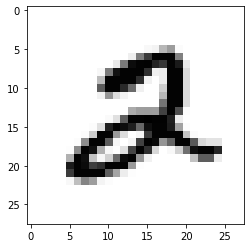

In [8]:
# Display the data as an image
import matplotlib.pyplot as plt
plt.imshow(x_train[5], cmap='Greys')

In [9]:
# Task 5 Data Preparation
# Flatten the array of each image into a 784 array. Do this for train and test.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [10]:
# Check the results
x_train.shape

(60000, 784)

In [11]:
#Scale the values of the pixels from 0-255 to 0.0-1.0.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
#Check the results
x_train[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
# Task 6: Model build and training
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:
# Construct the model
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_shape=(784, ), activation=tf.nn.relu))
model.add(Dense(16, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [15]:
# Train the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4562 - accuracy: 0.8708
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2432 - accuracy: 0.9297
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2044 - accuracy: 0.9409
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1824 - accuracy: 0.9466
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1673 - accuracy: 0.9504
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1546 - accuracy: 0.9538
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1456 - accuracy: 0.9565
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1388 - accuracy: 0.9594
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1325 - accuracy: 0.9609
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.127

In [16]:
# Check Model Accuracy
# Epoch 10/10
# 1875/1875 [==============================] - 3s 2ms/step - loss: 0.1276 - accuracy: 0.9620

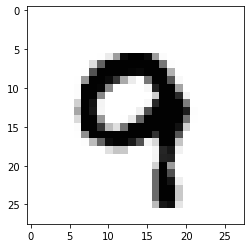

In [17]:
# Visual verification of the model by predicting 
plt.imshow(x_test[99].reshape(28, 28),cmap='Greys')

In [18]:
# What is the official label for this digit
y_test[99]

9

In [19]:
# Is our model able to correctly classify it as a 9
predict = model.predict(x_test[99].reshape(1,784))
print(predict.argmax())

9


In [20]:
# Numerical verification of the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1592 - accuracy: 0.9554


[0.1592496782541275, 0.9553999900817871]

In [ ]:
# Conclusion of numerical verification
#313/313 [==============================] - 1s 1ms/step - loss: 0.1592 - accuracy: 0.9554
# [0.1592496782541275, 0.9553999900817871]